In [152]:
# Loading Important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

# Stats Modules
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,StandardScaler
from sklearn.feature_selection import RFE
from scipy import stats
from scipy.stats import norm, skew #for some statistics


# For Decision Tree
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus , graphviz
from sklearn.tree import DecisionTreeClassifier

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)


In [153]:
# Read The Data

data_raw = pd.read_csv('ecomm_modelling_raw_data.csv')
data_raw.head()

,UID,laptop_flag,desktop_flag,monitor_flag,accessories_flag,service_selection_flag,rec_flag,cart_flag,sessions,pages,total_time,converted_flag
0,000be75502a26e2132dbd96b539f6a46,1,0,0,0,0,0,0,1,2,9,0
1,000ceee7a4c6cbe2a332fe1ba728c9b7,0,0,0,0,0,0,0,1,1,0,0
2,000dcd6ca8eadac7a85d2e34784c4d60,1,1,0,0,0,0,0,2,17,27751,0
3,00129c8f43c932502699b386e3185855,1,0,0,0,0,0,0,1,8,183,0
4,0027f83e7b94371cacb16787ec6bf279,0,0,0,0,0,0,0,1,2,101,0


In [154]:
X = data_raw.drop(['UID','converted_flag'],axis =1 )
Y = data_raw['converted_flag']

In [155]:
X_Train, X_Test , Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.2, random_state = 150)

In [156]:
X_Train.describe()

,laptop_flag,desktop_flag,monitor_flag,accessories_flag,service_selection_flag,rec_flag,cart_flag,sessions,pages,total_time
count,834715.000000,834715.000000,834715.000000,834715.000000,834715.000000,834715.000000,834715.000000,834715.000000,834715.000000,8.347150e+05
mean,0.316459,0.078544,0.000455,0.315490,0.049053,0.039370,0.053331,2.027281,4.302536,2.031160e+05
std,0.465095,0.269026,0.021332,0.464711,0.215978,0.194475,0.224692,5.688413,15.309032,7.164900e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.800000e+02
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1349.000000,3690.000000,7.760401e+06


In [157]:
# Block for functions 

# Detect Outlier % on data using IQR method
def detect_outlier_percent(series):
    upper_quartile = np.percentile(series, 75)
    lower_quartile = np.percentile(series, 25)
    iqr = upper_quartile - lower_quartile
    upper_wisker = upper_quartile + 1.5*iqr
    lower_wisker = lower_quartile - 1.5*iqr
    series_points_above_wiskers = np.where(series>upper_wisker, 1, 0).sum()
    series_points_below_wiskers = np.where(series<lower_wisker, 1, 0).sum()
    return (upper_wisker,lower_wisker)

def remove_outlier(df,series_df,cutoff,col):
    list_to_remove = series_df[series_df[col]>cutoff][col].index.tolist()
    return df[~df[col].isin(list_to_remove)]
    

In [158]:
'''
#EDA Starts

sns.boxplot( X_Train['sessions'])
plt.show()

(upper_wisker,lower_wisker) = detect_outlier_percent(X_Train['sessions'])
print(upper_wisker,lower_wisker)
print(np.percentile(X_Train['sessions'], [75,80,85,90,99.5,100]))

# Capping the data at 99%
per_cap = np.percentile(X_Train['sessions'], 99)
X_Train['sessions_processed'] = X_Train['sessions'].apply(lambda x:per_cap if x>per_cap else x)
sns.boxplot( X_Train['sessions_processed'])
plt.show()
'''

"\n#EDA Starts\n\nsns.boxplot( X_Train['sessions'])\nplt.show()\n\n(upper_wisker,lower_wisker) = detect_outlier_percent(X_Train['sessions'])\nprint(upper_wisker,lower_wisker)\nprint(np.percentile(X_Train['sessions'], [75,80,85,90,99.5,100]))\n\n# Capping the data at 99%\nper_cap = np.percentile(X_Train['sessions'], 99)\nX_Train['sessions_processed'] = X_Train['sessions'].apply(lambda x:per_cap if x>per_cap else x)\nsns.boxplot( X_Train['sessions_processed'])\nplt.show()\n"

In [159]:
'''
#EDA Starts

sns.boxplot( X_Train['pages'])
plt.show()

(upper_wisker,lower_wisker) = detect_outlier_percent(X_Train['pages'])
print(upper_wisker,lower_wisker)
print(np.percentile(X_Train['pages'], [75,80,85,90,99.5,100]))

# Capping the data at 99%
per_cap = np.percentile(X_Train['pages'], 99)
X_Train['pages_processed'] = X_Train['pages'].apply(lambda x:per_cap if x>per_cap else x)
sns.boxplot( X_Train['pages_processed'])
plt.show()
'''

"\n#EDA Starts\n\nsns.boxplot( X_Train['pages'])\nplt.show()\n\n(upper_wisker,lower_wisker) = detect_outlier_percent(X_Train['pages'])\nprint(upper_wisker,lower_wisker)\nprint(np.percentile(X_Train['pages'], [75,80,85,90,99.5,100]))\n\n# Capping the data at 99%\nper_cap = np.percentile(X_Train['pages'], 99)\nX_Train['pages_processed'] = X_Train['pages'].apply(lambda x:per_cap if x>per_cap else x)\nsns.boxplot( X_Train['pages_processed'])\nplt.show()\n"

In [160]:
'''
#EDA Starts

sns.boxplot( X_Train['total_time'])
plt.show()

(upper_wisker,lower_wisker) = detect_outlier_percent(X_Train['total_time'])
print(upper_wisker,lower_wisker)
print(np.percentile(X_Train['total_time'], [75,80,85,90,99.5,100]))

# Capping the data at upper wisker
per_cap = upper_wisker
X_Train['total_time_processed'] = X_Train['total_time'].apply(lambda x:per_cap if x>per_cap else x)
sns.boxplot( X_Train['total_time_processed'])
plt.show()
'''

"\n#EDA Starts\n\nsns.boxplot( X_Train['total_time'])\nplt.show()\n\n(upper_wisker,lower_wisker) = detect_outlier_percent(X_Train['total_time'])\nprint(upper_wisker,lower_wisker)\nprint(np.percentile(X_Train['total_time'], [75,80,85,90,99.5,100]))\n\n# Capping the data at upper wisker\nper_cap = upper_wisker\nX_Train['total_time_processed'] = X_Train['total_time'].apply(lambda x:per_cap if x>per_cap else x)\nsns.boxplot( X_Train['total_time_processed'])\nplt.show()\n"

In [161]:
# Finding Correl

numeric_col = ['total_time','sessions','pages']
numeric_df = X_Train[numeric_col]
numeric_df.corr()

,total_time,sessions,pages
total_time,1.000000,0.311811,0.297881
sessions,0.311811,1.000000,0.948143
pages,0.297881,0.948143,1.000000


In [162]:
# Woe for categorical

# Weight of Evidence analysis to check the significance of each column

def woe_cal(df,feature,target):
    df_woe_iv = (pd.crosstab(df[feature],df[target],
                      normalize='columns')
             .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
             .assign(iv=lambda dfx: dfx['woe']*
                                           (dfx[1]-dfx[0])))
    return df_woe_iv


'''
<0.02              useless for prediction
0.02 to 0.1        week predictor
0.1 to 0.3         medium predictor 
0.3 - 0.5          strong predictor
>0.5               suspisious or too good to be true



'''

# WOE for different variables
train_data = pd.concat([X_Train,Y_Train],axis  = 1)
col_list = ['laptop_flag', 'desktop_flag', 'monitor_flag', 'accessories_flag','service_selection_flag', 'rec_flag', 'cart_flag']
for col in col_list:
    res_df = woe_cal(train_data,col,'converted_flag')
    print(col," ",round(res_df[np.isfinite(res_df['iv'])]['iv'].sum(),2))



laptop_flag   0.06
desktop_flag   0.04
monitor_flag   0.0
accessories_flag   0.22
service_selection_flag   1.56
rec_flag   1.63
cart_flag   2.41


In [163]:
'''
# Creating new feature columns
X_Train['time_per_session'] = X_Train['total_time']/X_Train['sessions']
X_Train['page_per_session'] = X_Train['pages']/X_Train['sessions']

#sns.boxplot(X_Train['time_per_session'])
#plt.show()
#sns.boxplot(X_Train['page_per_session'])
#plt.show()

'''

"\n# Creating new feature columns\nX_Train['time_per_session'] = X_Train['total_time']/X_Train['sessions']\nX_Train['page_per_session'] = X_Train['pages']/X_Train['sessions']\n\n#sns.boxplot(X_Train['time_per_session'])\n#plt.show()\n#sns.boxplot(X_Train['page_per_session'])\n#plt.show()\n\n"

In [164]:
print(X_Train.columns)
#X_Train = X_Train.drop(['service_selection_flag', 'rec_flag'],axis=1)

Index(['laptop_flag', 'desktop_flag', 'monitor_flag', 'accessories_flag',
       'service_selection_flag', 'rec_flag', 'cart_flag', 'sessions', 'pages',
       'total_time'],
      dtype='object')


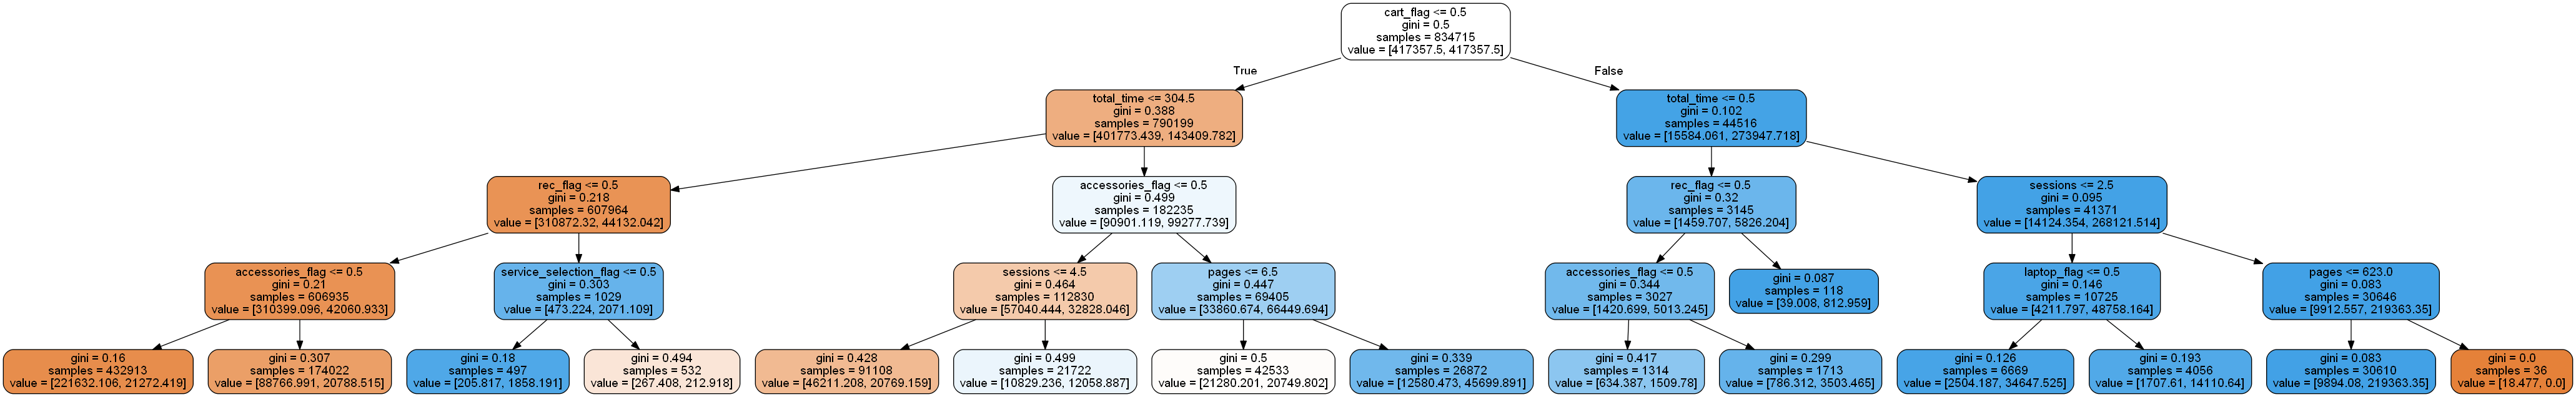

In [183]:
dt = DecisionTreeClassifier(max_depth = 4,class_weight='balanced')
dt.fit(X_Train, Y_Train)

# Plotting the decision Tree
dot_data = StringIO()
export_graphviz(dt,out_file = dot_data,filled = True,rounded = True,feature_names = X_Train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())




In [190]:
Y_Train_pred = dt.predict_proba(X_Train)
Y_Train_pred_v2 = Y_Train_pred.copy()
cutoff = 0.2

Y_Train_pred = pd.DataFrame(Y_Train_pred)
Y_Train_pred.columns = ['no','yes']
Y_Train_pred['yes'] = Y_Train_pred['yes'].apply(lambda x: 1 if x>=cutoff else 0)
Y_Train_pred  = Y_Train_pred['yes']
# Confusion matrix 
confusion_matrix_train = confusion_matrix(Y_Train, Y_Train_pred)
print(confusion_matrix_train)

# Checking other metrics
TP = confusion_matrix_train[1,1] # true positive 
TN = confusion_matrix_train[0,0] # true negatives
FP = confusion_matrix_train[0,1] # false positives
FN = confusion_matrix_train[1,0] # false negatives

# Checking Accuracy
# Checking the overall accuracy.
print("Accuracy: ",(TP+TN)/float(TP+FP+TN+FN))
# Checking the sensitivity of the model
print("recall: ",TP / float(TP+FN))
# Calculating specificity
print("Specificity: ",TN / float(TN+FP))
# Calculating Precision
print("precision: ",TP/float(TP + FP))


recall = TP / float(TP+FN)
precision = TP/float(TP + FP)

f_score = 2*(recall * precision) / (recall + precision)
print('f-score ', f_score)

[[604798 208355]
 [  2173  19389]]
Accuracy:  0.7477845731776714
recall:  0.8992208514980058
Specificity:  0.7437690078005
precision:  0.08513506393143179
f-score  0.15554378955981807


In [185]:
def metrics_return(cutoff,Y_Train,Y_Train_pred):
    Y_Train_pred = pd.DataFrame(Y_Train_pred)
    Y_Train_pred.columns = ['no','yes']
    Y_Train_pred['yes'] = Y_Train_pred['yes'].apply(lambda x: 1 if x>=cutoff else 0)
    Y_Train_pred  = Y_Train_pred['yes']
    
    confusion_matrix_train = confusion_matrix(Y_Train, Y_Train_pred)
    TP = confusion_matrix_train[1,1] # true positive 
    TN = confusion_matrix_train[0,0] # true negatives
    FP = confusion_matrix_train[0,1] # false positives
    FN = confusion_matrix_train[1,0] # false negatives
    recall = TP / float(TP+FN)
    precision = TP/float(TP + FP)
    return [cutoff,precision,recall]
   

In [191]:
Y_Test_pred = dt.predict_proba(X_Test)
Y_Test_pred_v2 = Y_Test_pred.copy()
cutoff = 0.2

Y_Test_pred = pd.DataFrame(Y_Test_pred)
Y_Test_pred.columns = ['no','yes']
Y_Test_pred['yes'] = Y_Test_pred['yes'].apply(lambda x: 1 if x>=cutoff else 0)
Y_Test_pred  = Y_Test_pred['yes']
# Confusion matrix 
confusion_matrix_test = confusion_matrix(Y_Test, Y_Test_pred)
print(confusion_matrix_test)

# Checking other metrics
TP = confusion_matrix_test[1,1] # true positive 
TN = confusion_matrix_test[0,0] # true negatives
FP = confusion_matrix_test[0,1] # false positives
FN = confusion_matrix_test[1,0] # false negatives

# Checking Accuracy
# Checking the overall accuracy.
print("Accuracy: ",(TP+TN)/float(TP+FP+TN+FN))
# Checking the sensitivity of the model
print("recall: ",TP / float(TP+FN))
# Calculating specificity
print("Specificity: ",TN / float(TN+FP))
# Calculating Precision
print("precision: ",TP/float(TP + FP))


recall = TP / float(TP+FN)
precision = TP/float(TP + FP)

f_score = 2*(recall * precision) / (recall + precision)
print('f-score ', f_score)

[[151184  52067]
 [   568   4860]]
Accuracy:  0.7477704991877477
recall:  0.8953574060427414
Specificity:  0.743829058651618
precision:  0.08537249459834526
f-score  0.15588164541736832
